# Multiple Linear Regression
## Linear Regression - Assignment

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
carprice = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the carprice dataframe

In [5]:
carprice.shape

(205, 26)

In [6]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

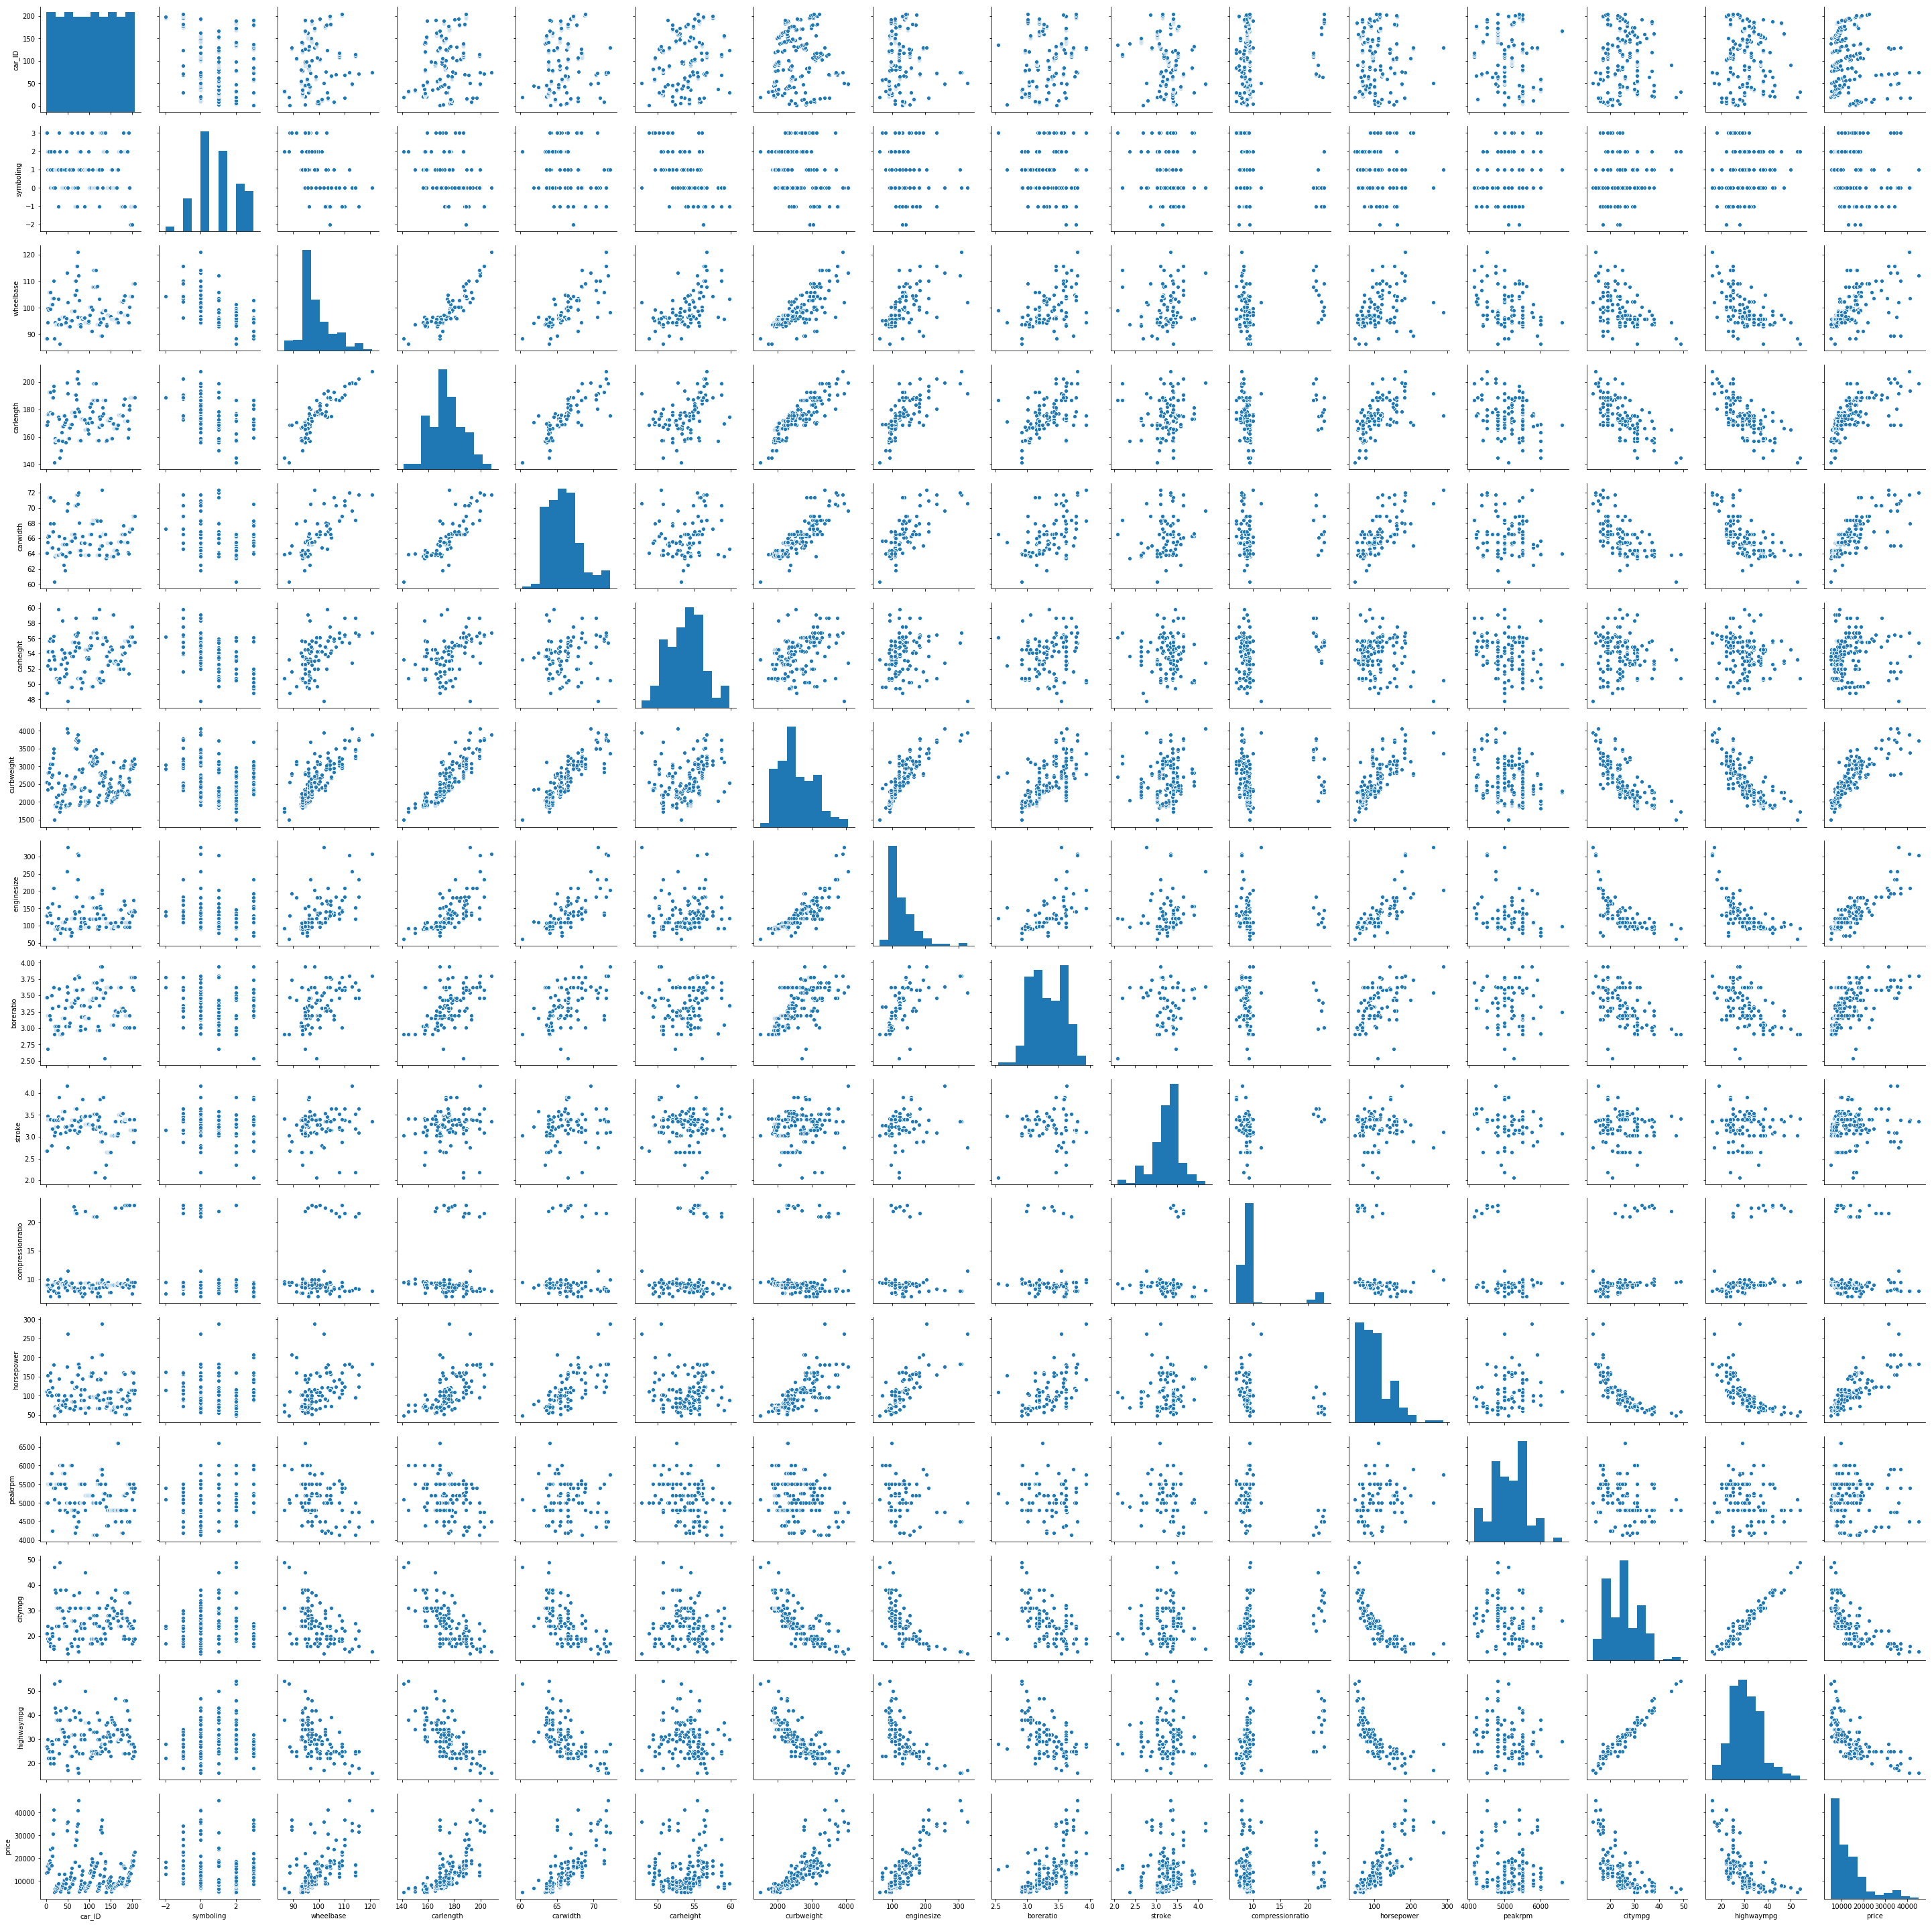

In [9]:
sns.pairplot(carprice)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

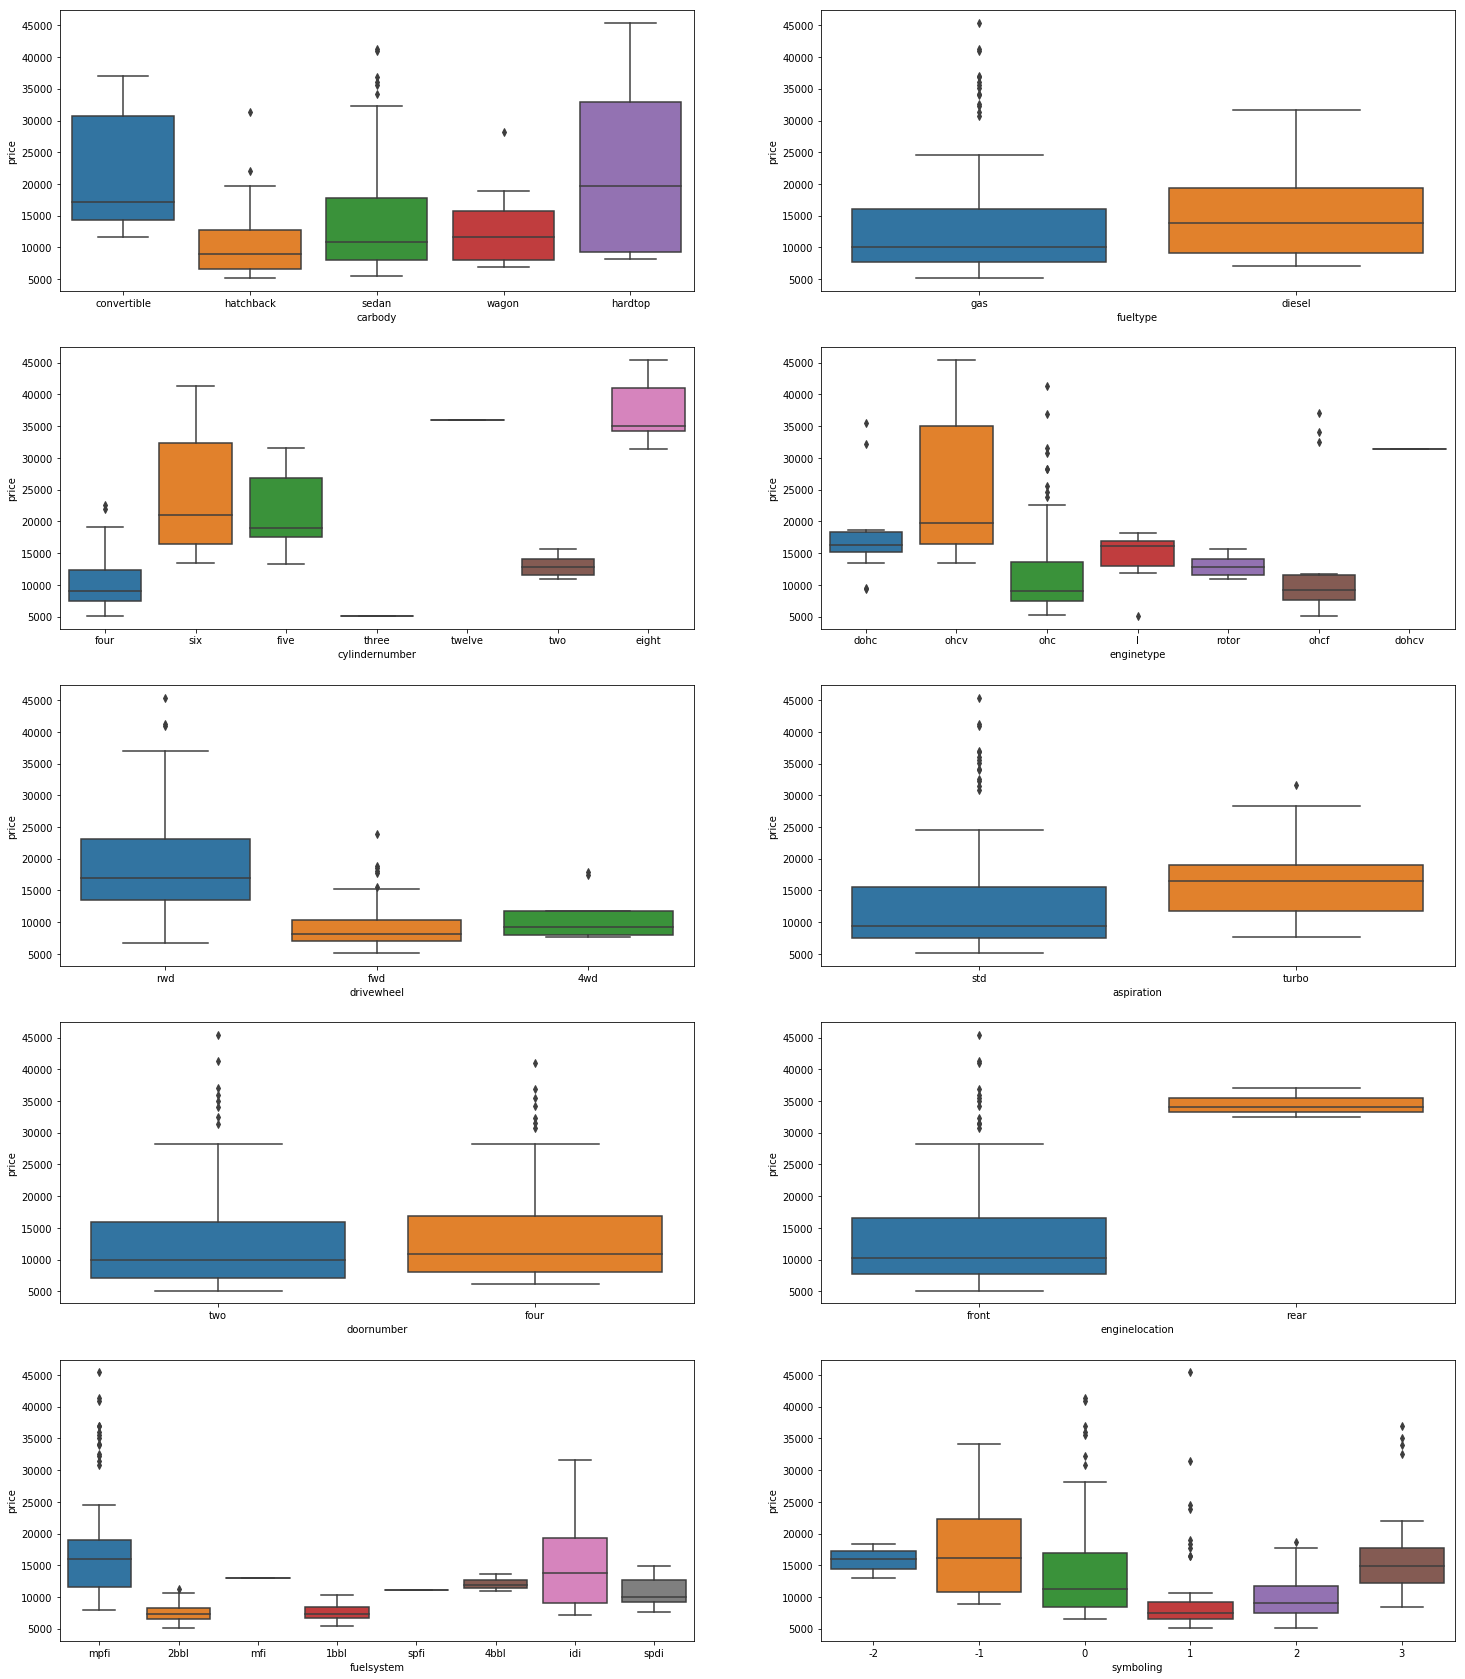

In [10]:
plt.figure(figsize=(25, 30))
plt.subplot(5,2,1)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(5,2,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(5,2,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(5,2,4)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(5,2,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(5,2,6)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(5,2,7)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(5,2,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(5,2,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.subplot(5,2,10)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `carbody` with `fueltype` as the hue.

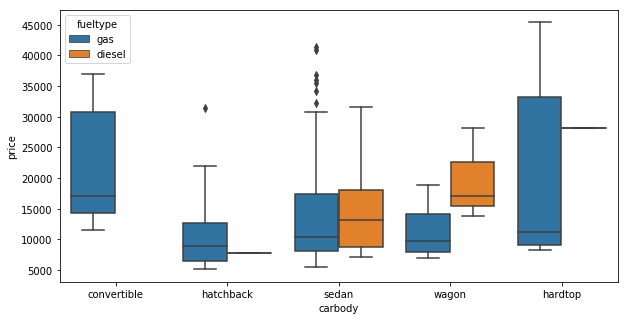

In [11]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'fueltype', data = carprice)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `carbody` with `aspiration` as the hue.

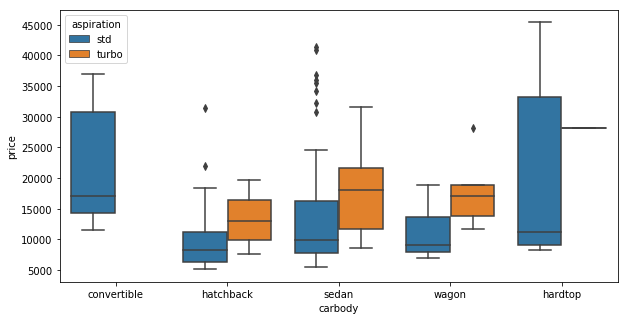

In [12]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'aspiration', data = carprice)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `carbody` with `drivewheel` as the hue.

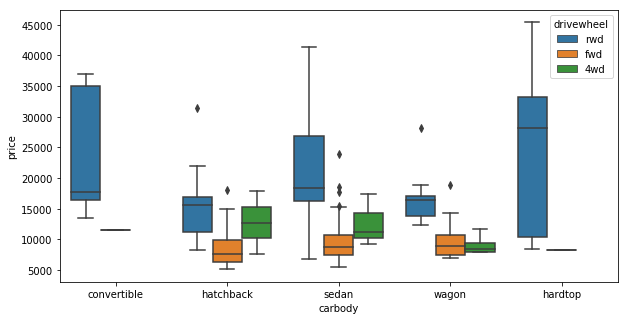

In [13]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'drivewheel', data = carprice)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `symboling` with `fueltype` as the hue.

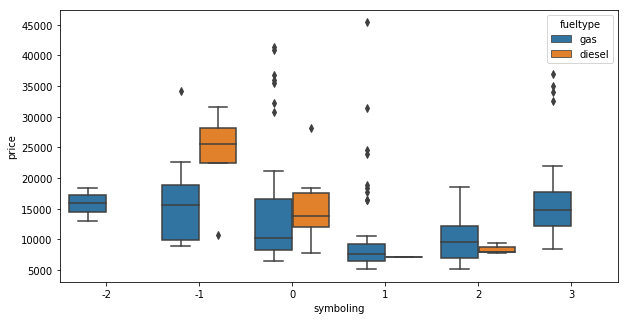

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'symboling', y = 'price', hue = 'fueltype', data = carprice)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `enginetype` with `aspiration` as the hue.

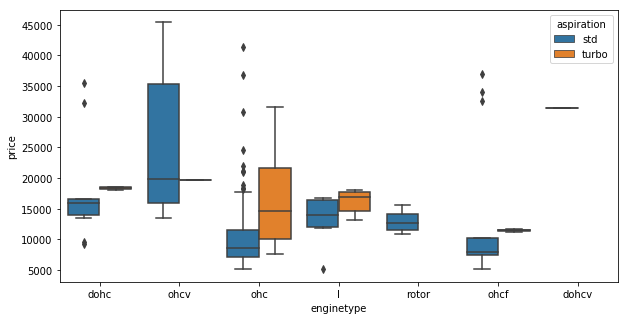

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'enginetype', y = 'price', hue = 'aspiration', data = carprice)
plt.show()

## Step 3: Data Preparation

- You can see that your dataset has many columns with only two type of values.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

In [16]:
# List of variables to map
varlist1 =  ['doornumber']
# Defining the map function
def binary_map(x):
    return x.map({'four': 1, "two": 0})

# Applying the function to the carprice list
carprice[varlist1] = carprice[varlist1].apply(binary_map)

#renaming the variables
carprice.rename(columns={'four': 'doornumber_4', 'two': 'doornumber_2'}, inplace=True)

In [17]:
# List of variables to map
varlist2 =  ['enginelocation']
def binary_map(x):
    return x.map({'front': 1, "rear": 0})

# Applying the function to the carprice list
carprice[varlist2] = carprice[varlist2].apply(binary_map)

#renaming the variables
carprice.rename(columns={'front': 'enginelocation_front', 'rear': 'enginelocation_rear'}, inplace=True)

In [18]:
# List of variables to map
varlist3 =  ['fueltype']
def binary_map(x):
    return x.map({'gas': 1, "diesel": 0})

# Applying the function to the carprice list
carprice[varlist3] = carprice[varlist3].apply(binary_map)


In [19]:
# List of variables to map
varlist4 =  ['aspiration']
def binary_map(x):
    return x.map({'std': 1, "turbo": 0})

# Applying the function to the carprice list
carprice[varlist4] = carprice[varlist4].apply(binary_map)


In [20]:
# Check the carprice dataframe now

carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,0,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,0,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,0,hatchback,rwd,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,1,sedan,fwd,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,1,sedan,4wd,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Dummy Variables

There are many categorical variables in the dataframe that have more than two levels. We need to convert these levels into integer as well.

For this, we will use something called `dummy variables`.

In [21]:
# Get the dummy variables for the feature 'cylindernumber' and store it in a new variable - 'status1'
status1 = pd.get_dummies(carprice['cylindernumber'])
# Check what the dataset 'status1' looks like
status1.head()

,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


Now, you only need 'n-1' columns. You can drop any one column.

In [22]:
# Let's drop the first column from status1 df using 'drop_first = True'

status1 = pd.get_dummies(carprice['cylindernumber'], drop_first = True)

In [23]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, status1], axis = 1)

In [24]:
# Drop 'cylindernumber' as we have created the dummies for it

carprice.drop(['cylindernumber'], axis = 1, inplace = True)

#renaming the variables
carprice.rename(columns={'five': '#ofcylinders5','four':'#ofcylinders4','six':'#ofcylinders6'
                   ,'three':'#ofcylinders3','twelve':'#ofcylinders12','two':'#ofcylinders2'}, inplace=True)

In [25]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'status2'
status2 = pd.get_dummies(carprice['fuelsystem'])
# Check what the dataset 'status2' looks like
status2.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


Now, you only need 'n-1' columns. You can drop any one column.

In [26]:
# Let's drop the first column from status2 df using 'drop_first = True'

status2 = pd.get_dummies(carprice['fuelsystem'], drop_first = True)

In [27]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, status2], axis = 1)

In [28]:
# Drop 'fuelsystem' as we have created the dummies for it

carprice.drop(['fuelsystem'], axis = 1, inplace = True)

#renaming the variables
carprice.rename(columns={'2bbl': 'fuelsystem_2bbl','4bbl':'fuelsystem_4bbl','idi':'fuelsystem_idi'
                   ,'mfi':'fuelsystem_mfi','mpfi':'fuelsystem_mpfi','spdi':'fuelsystem_spdi',
                   'spfi':'fuelsystem_spfi'}, inplace=True)

In [29]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'status3'
status3 = pd.get_dummies(carprice['enginetype'])
# Check what the dataset 'status3' looks like
status3.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


Now, you only need 'n-1' columns. You can drop any one column.

In [30]:
# Let's drop the first column from status3 df using 'drop_first = True'

status3 = pd.get_dummies(carprice['enginetype'], drop_first = True)

In [31]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, status3], axis = 1)

In [32]:
# Drop 'enginetype' as we have created the dummies for it

carprice.drop(['enginetype'], axis = 1, inplace = True)

#renaming the variables
carprice.rename(columns={'dohcv': 'engine_dohcv','l':'engine_1','ohc':'engine_ohc',
                   'ohcf':'engine_ohcf','ohcv':'engine_ohcv','rotor':'engine_rotor'}, inplace=True)

In [33]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'status4'
status4 = pd.get_dummies(carprice['carbody'])
# Check what the dataset 'status4' looks like
status4.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


Now, you only need 'n-1' columns. You can drop any one column.

In [34]:
# Let's drop the first column from status4 df using 'drop_first = True'

status4 = pd.get_dummies(carprice['carbody'], drop_first = True)

In [35]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, status4], axis = 1)

In [36]:
# Drop 'carbody' as we have created the dummies for it

carprice.drop(['carbody'], axis = 1, inplace = True)

In [37]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'status5'
status5 = pd.get_dummies(carprice['drivewheel'])
# Check what the dataset 'status5' looks like
status5.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


Now, you only need 'n-1' columns. You can drop any one column.

In [38]:
# Let's drop the first column from status5 df using 'drop_first = True'

status5 = pd.get_dummies(carprice['drivewheel'], drop_first = True)

In [39]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, status5], axis = 1)

In [40]:
# Drop 'drivewheel' as we have created the dummies for it

carprice.drop(['drivewheel'], axis = 1, inplace = True)

#renaming the variables
carprice.rename(columns={'fwd': 'fwd_wheeldrive','rwd':'rwd_wheeldrive'}, inplace=True)

In [41]:
# Get the dummy variables for the feature 'symboling' and store it in a new variable - 'status6'
status6 = pd.get_dummies(carprice['symboling'])
# Check what the dataset 'status6' looks like
status6.head()

,-2,-1,0,1,2,3
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


Now, you only need 'n-1' columns. You can drop any one column.

In [42]:
# Let's drop the first column from status6 df using 'drop_first = True'

status6 = pd.get_dummies(carprice['symboling'], drop_first = True)

# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, status6], axis = 1)

In [43]:
# Drop 'symboling' as we have created the dummies for it

carprice.drop(['symboling'], axis = 1, inplace = True)

#renaming the variables
carprice.rename(columns={-2: 'symboling_-2',-1:'symboling_-1',0:'symboling_0',1:'symboling_1',2:'symboling_2'
                        ,3:'symboling_3'}, inplace=True)

In [44]:
#now check the dataframe
carprice.head()

,car_ID,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,hatchback,sedan,wagon,fwd_wheeldrive,rwd_wheeldrive,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1,alfa-romero giulia,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,1,0,0,0,0,1
1,2,alfa-romero stelvio,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,1,0,0,0,0,1
2,3,alfa-romero Quadrifoglio,1,1,0,1,94.5,171.2,65.5,52.4,...,1,0,0,0,1,0,0,1,0,0
3,4,audi 100 ls,1,1,1,1,99.8,176.6,66.2,54.3,...,0,1,0,1,0,0,0,0,1,0
4,5,audi 100ls,1,1,1,1,99.4,176.6,66.4,54.3,...,0,1,0,0,0,0,0,0,1,0


In [45]:
# do the data cleaning by replacing different spellings of the same value to one
carprice['CarName'] = carprice['CarName'].replace('toyouta', 'toyota', regex=True)
carprice['CarName'] = carprice['CarName'].replace('vw', 'volkswagen', regex=True)
carprice['CarName'] = carprice['CarName'].replace('vokswagen', 'volkswagen', regex=True)
carprice['CarName'] = carprice['CarName'].replace('maxda', 'mazda', regex=True)
carprice['CarName'] = carprice['CarName'].replace('porcshce', 'porsche', regex=True)
carprice['CarName'] = carprice['CarName'].replace('Nissan', 'nissan', regex=True)
carprice.head()

,car_ID,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,hatchback,sedan,wagon,fwd_wheeldrive,rwd_wheeldrive,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1,alfa-romero giulia,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,1,0,0,0,0,1
1,2,alfa-romero stelvio,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,1,0,0,0,0,1
2,3,alfa-romero Quadrifoglio,1,1,0,1,94.5,171.2,65.5,52.4,...,1,0,0,0,1,0,0,1,0,0
3,4,audi 100 ls,1,1,1,1,99.8,176.6,66.2,54.3,...,0,1,0,1,0,0,0,0,1,0
4,5,audi 100ls,1,1,1,1,99.4,176.6,66.4,54.3,...,0,1,0,0,0,0,0,0,1,0


In [46]:
#removing '-' to make the column values to a single type
carprice['CarName'] = carprice['CarName'].replace('-', ' ', regex=True)

In [47]:
carprice.head()

,car_ID,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,hatchback,sedan,wagon,fwd_wheeldrive,rwd_wheeldrive,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1,alfa romero giulia,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,1,0,0,0,0,1
1,2,alfa romero stelvio,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,1,0,0,0,0,1
2,3,alfa romero Quadrifoglio,1,1,0,1,94.5,171.2,65.5,52.4,...,1,0,0,0,1,0,0,1,0,0
3,4,audi 100 ls,1,1,1,1,99.8,176.6,66.2,54.3,...,0,1,0,1,0,0,0,0,1,0
4,5,audi 100ls,1,1,1,1,99.4,176.6,66.4,54.3,...,0,1,0,0,0,0,0,0,1,0


In [48]:
#spliting 'CarName' to 'carcompany' and 'carmodel'
carprice[['carcompany','carmodel']] = carprice['CarName'].str.split(' ',1,expand=True)
carprice.head()

,car_ID,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,wagon,fwd_wheeldrive,rwd_wheeldrive,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carcompany,carmodel
0,1,alfa romero giulia,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,1,0,0,0,0,1,alfa,romero giulia
1,2,alfa romero stelvio,1,1,0,1,88.6,168.8,64.1,48.8,...,0,0,1,0,0,0,0,1,alfa,romero stelvio
2,3,alfa romero Quadrifoglio,1,1,0,1,94.5,171.2,65.5,52.4,...,0,0,1,0,0,1,0,0,alfa,romero Quadrifoglio
3,4,audi 100 ls,1,1,1,1,99.8,176.6,66.2,54.3,...,0,1,0,0,0,0,1,0,audi,100 ls
4,5,audi 100ls,1,1,1,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,1,0,audi,100ls


In [49]:
#dropping unnecessary columns
carprice.drop(['car_ID', 'CarName', 'carmodel'], axis = 1, inplace = True)

carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,sedan,wagon,fwd_wheeldrive,rwd_wheeldrive,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,carcompany
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,1,0,0,0,0,1,alfa
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,1,0,0,0,0,1,alfa
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,1,0,0,1,0,0,alfa
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,1,0,1,0,0,0,0,1,0,audi
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,1,0,0,0,0,0,0,1,0,audi


In [50]:
#check for duplicate values
carprice.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [51]:
carprice.shape

(205, 49)

In [52]:
# Get the dummy variables for the feature 'carcompany' and store it in a new variable - 'status7'

status7 = pd.get_dummies(carprice['carcompany'])

# Check what the dataset 'status7' looks like

status7.head()

,alfa,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Let's drop the first column from status7 df using 'drop_first = True'

status7 = pd.get_dummies(carprice['carcompany'], drop_first = True)

In [54]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, status7], axis = 1)

In [55]:
# Drop 'carcompany' as we have created the dummies for it

carprice.drop(['carcompany'], axis = 1, inplace = True)

In [56]:
#now check the dataframe

carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [57]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

In [60]:
# Apply scaler() to all the columns except the 'two variable types' and 'dummy' variables
num_vars = ['wheelbase', 'citympg', 'enginesize', 'highwaympg', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'carheight'
            , 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [61]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,...,0,0,1,0,0,0,0,0,0,0
125,1,1,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,...,0,0,0,1,0,0,0,0,0,0
166,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,...,0,0,0,0,0,0,0,0,0,0
199,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,...,0,0,0,0,0,0,0,0,0,1


In [62]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (150, 150))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `enginesize` seems to the correlated to `price` the most. Let's see a pairplot for `enginesize` vs `price`.

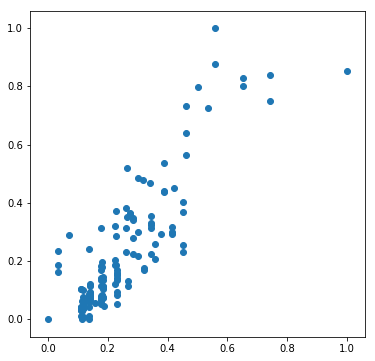

In [64]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

### Dividing into X and Y sets for the model building

In [65]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [66]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [67]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 18),
 ('aspiration', False, 7),
 ('doornumber', False, 48),
 ('enginelocation', True, 1),
 ('wheelbase', False, 8),
 ('carlength', False, 14),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 20),
 ('horsepower', False, 3),
 ('peakrpm', False, 5),
 ('citympg', False, 29),
 ('highwaympg', False, 21),
 ('#ofcylinders5', True, 1),
 ('#ofcylinders4', True, 1),
 ('#ofcylinders6', False, 23),
 ('#ofcylinders3', True, 1),
 ('#ofcylinders12', True, 1),
 ('#ofcylinders2', True, 1),
 ('fuelsystem_2bbl', False, 28),
 ('fuelsystem_4bbl', False, 32),
 ('fuelsystem_idi', False, 19),
 ('fuelsystem_mfi', False, 42),
 ('fuelsystem_mpfi', False, 49),
 ('fuelsystem_spdi', False, 50),
 ('fuelsystem_spfi', False, 44),
 ('engine_dohcv', False, 6),
 ('engine_1', False, 2),
 ('engine_ohc', False, 51),
 ('engine_ohcf', False, 16),
 ('engine_ohcv', False, 40),
 (

In [69]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', '#ofcylinders5', '#ofcylinders4', '#ofcylinders3',
       '#ofcylinders12', '#ofcylinders2', 'engine_rotor', 'bmw', 'peugeot',
       'porsche'],
      dtype='object')

In [70]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', '#ofcylinders6', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'engine_dohcv', 'engine_1',
       'engine_ohc', 'engine_ohcf', 'engine_ohcv', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd_wheeldrive', 'rwd_wheeldrive', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'audi',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'plymouth', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [71]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [72]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [73]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [74]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.03e-70
Time:                        21:33:02   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0736      0.077      0.

## Step 6:Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [75]:
X_train_new = X_train_rfe.drop(['const'], axis=1)  #drop the constant

In [76]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,#ofcylinders2,inf
11,engine_rotor,inf
3,enginesize,85.160000
0,enginelocation,59.040000
2,curbweight,54.190000
7,#ofcylinders4,46.190000
1,carwidth,42.690000
4,boreratio,37.590000
5,stroke,30.790000
9,#ofcylinders12,2.920000


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [77]:
#as '#ofcylinders2' has highest VIF it means it is highly multicollinear. so lets drop it
X_train_new = X_train_new.drop(["#ofcylinders2"], axis = 1)

In [78]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [79]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [80]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.03e-70
Time:                        21:33:09   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0736      0.077      0.

In [81]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,85.16
0,enginelocation,59.04
2,curbweight,54.19
7,#ofcylinders4,46.19
1,carwidth,42.69
4,boreratio,37.59
5,stroke,30.79
10,engine_rotor,5.09
9,#ofcylinders12,2.92
6,#ofcylinders5,2.84


In [82]:
#as lets drop 'enginelocation'
X_train_new = X_train_new.drop(["enginelocation"], axis = 1)

In [83]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [84]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [85]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     129.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.21e-67
Time:                        21:33:15   Log-Likelihood:                 206.07
No. Observations:                 143   AIC:                            -384.1
Df Residuals:                     129   BIC:                            -342.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2413      0.040     -6.

In [86]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,76.41
1,curbweight,54.05
0,carwidth,37.76
3,boreratio,34.45
4,stroke,30.78
6,#ofcylinders4,23.68
9,engine_rotor,3.82
8,#ofcylinders12,2.75
5,#ofcylinders5,2.56
11,peugeot,1.60


In [87]:
#dropping the column'curbweight' as it has high VIF value

X_train_new = X_train_new.drop(['curbweight'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     120.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.34e-64
Time:                        21:33:16   Log-Likelihood:                 195.59
No. Observations:                 143   AIC:                            -365.2
Df Residuals:                     130   BIC:                            -326.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2346      0.043     -5.

In [88]:
#dropping the column'peugeot' as it has high p value

X_train_new = X_train_new.drop(['peugeot'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     131.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.18e-65
Time:                        21:33:17   Log-Likelihood:                 194.77
No. Observations:                 143   AIC:                            -365.5
Df Residuals:                     131   BIC:                            -330.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2190      0.041     -5.

### Dropping the variable and updating the model

As you can see from the summary, some variables are insignificant. Let's go ahead and drop these variables one by one.

In [89]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,55.01
2,boreratio,33.93
3,stroke,30.34
0,carwidth,27.13
5,#ofcylinders4,23.56
8,engine_rotor,3.57
7,#ofcylinders12,2.54
4,#ofcylinders5,2.41
6,#ofcylinders3,1.23
9,bmw,1.21


In [90]:
#dropping the column'boreratio' as it has high VIF value

X_train_new = X_train_new.drop(['boreratio'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     117.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.14e-60
Time:                        21:33:19   Log-Likelihood:                 180.89
No. Observations:                 143   AIC:                            -339.8
Df Residuals:                     132   BIC:                            -307.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1479      0.042     -3.

In [91]:
#dropping the column'#ofcylinders4' as it has high p value

X_train_new = X_train_new.drop(['#ofcylinders4'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.29e-61
Time:                        21:33:19   Log-Likelihood:                 180.58
No. Observations:                 143   AIC:                            -341.2
Df Residuals:                     133   BIC:                            -311.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1224      0.026     -4.

In [92]:
#dropping the column'stroke' as it has high p value

X_train_new = X_train_new.drop(['stroke'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     142.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.06e-61
Time:                        21:33:20   Log-Likelihood:                 178.07
No. Observations:                 143   AIC:                            -338.1
Df Residuals:                     134   BIC:                            -311.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1639      0.018     -9.

In [93]:
#dropping the column'#ofcylinders12' as it has high p value

X_train_new = X_train_new.drop(['#ofcylinders12'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     160.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.32e-62
Time:                        21:33:20   Log-Likelihood:                 176.55
No. Observations:                 143   AIC:                            -337.1
Df Residuals:                     135   BIC:                            -313.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1617      0.018     -8.859

In [94]:
#dropping the column'#ofcylinders3' as it has high p value

X_train_new = X_train_new.drop(['#ofcylinders3'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     181.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.39e-62
Time:                        21:33:21   Log-Likelihood:                 174.09
No. Observations:                 143   AIC:                            -334.2
Df Residuals:                     136   BIC:                            -313.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1520      0.018     -8.471

In [95]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,10.04
1,enginesize,9.75
2,#ofcylinders5,1.22
3,engine_rotor,1.17
4,bmw,1.14
5,porsche,1.07


In [96]:
#dropping the column'carwidth' as it has high VIF value

X_train_new = X_train_new.drop(['carwidth'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     177.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.83e-58
Time:                        21:33:22   Log-Likelihood:                 160.83
No. Observations:                 143   AIC:                            -309.7
Df Residuals:                     137   BIC:                            -291.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0816      0.013     -6.241

In [97]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.30
1,#ofcylinders5,1.11
3,bmw,1.11
4,porsche,1.07
2,engine_rotor,1.00


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [98]:
y_train_price = lm.predict(X_train_lm)

In [99]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

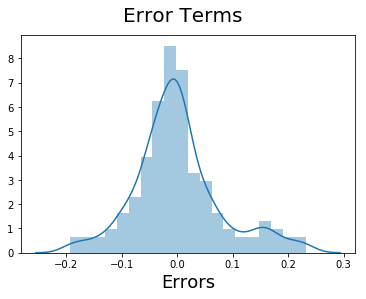

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [101]:
num_vars = ['wheelbase', 'citympg', 'enginesize', 'highwaympg', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'carheight'
            , 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [102]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,0.564516,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [103]:
y_test = df_test.pop('price')
X_test = df_test

In [104]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [105]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

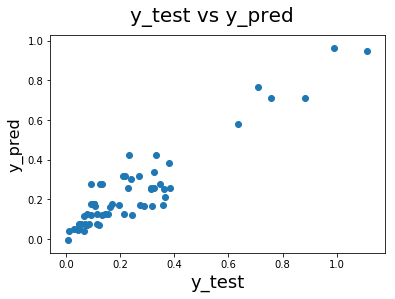

In [106]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

 let us now calculate the R-squared score on the test set.

In [107]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.866155502697283


We can see that the equation of our best fitted line is:

$ Price = 1.1205  \times  enginesize + 0.2513  \times  engine_rotor + 0.2311 \times porsche + 0.2233 \times BMW + 0.1474 \times no.ofcylinders5  $
